In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!pip install --upgrade mxnet-cu112

     |████████████████████████████████| 497.6 MB 47 kB/s s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install torch==1.6.0 torchvision==0.7.0

     |████████████████████████████████| 748.8 MB 77 kB/s s eta 0:00:01    |████▋                           | 108.0 MB 745 kB/s eta 0:14:20     |████████████████████████        | 562.3 MB 34.4 MB/s eta 0:00:06
     |████████████████████████████████| 5.9 MB 70.1 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 79.5 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=1f261c93be53f116fa20bb984b64b49b091054cc6e7d42a6a2f2e36a157fcbbd
  Stored in directory: /root/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install --upgrade gluoncv

     |████████████████████████████████| 1.3 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 74.7 MB/s eta 0:00:01
     |████████████████████████████████| 60.5 MB 78.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 9.5 MB/s  eta 0:00:01
     |████████████████████████████████| 41.6 MB 76.4 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 79.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [9]:
!apt install libnccl2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libnccl2
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 84.9 MB of archives.
After this operation, 230 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libnccl2 2.11.4-1+cuda11.6 [84.9 MB]
Fetched 84.9 MB in 6s (14.3 MB/s)   33m
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package libnccl2.
(Reading database ... 20632 files and directories currently installed.)
Preparing to unpack .../libnccl2_2.11.4-1+cuda11.6_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking libnccl2 (2.11.4-1+cuda11.6) ...
7Progress: [ 40%] [#######################........

In [10]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms

/usr/local/lib/python3.8/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.6.0` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [11]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

100%|██████████| 131497/131497 [00:05<00:00, 25711.58KB/s]


In [27]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

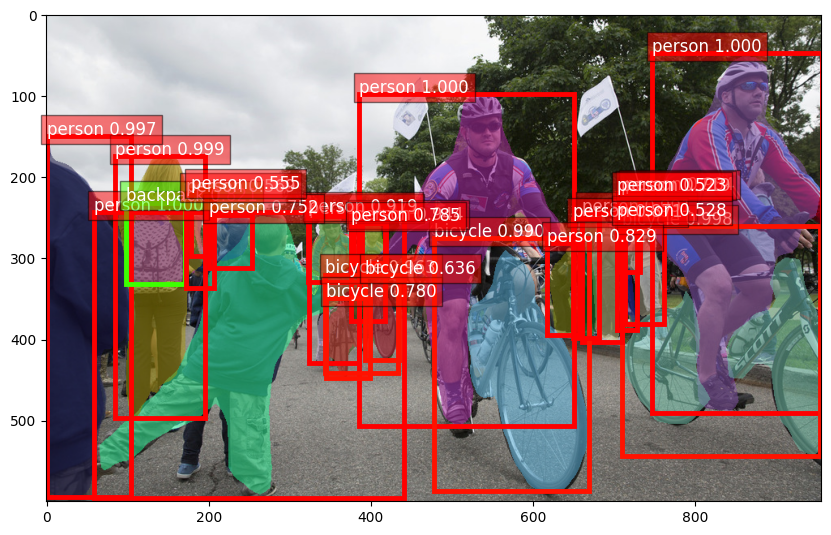

In [13]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

In [24]:
print(ids.shape, scores.shape, bboxes.shape, masks.shape)

(1000, 1) (1000, 1) (1000, 4) (25, 600, 956)


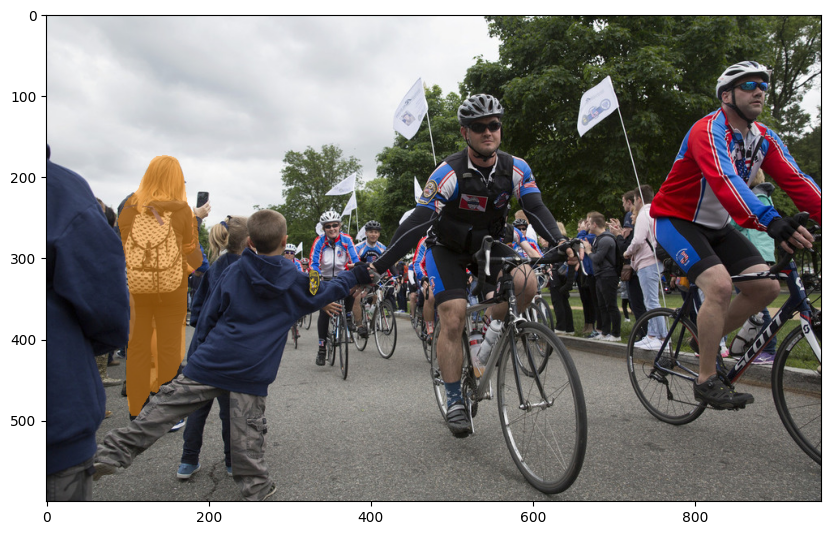

In [37]:
import numpy as np
withmask = utils.viz.plot_mask(orig_img, np.expand_dims(masks[3], axis=0))

width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
#ax = utils.viz.plot_bbox(withmask, bboxes, scores, ids, class_names=net.classes, ax=ax)
ax = plt.imshow(withmask)
plt.show()

In [38]:
im_fname = utils.download('https://c8.alamy.com/compes/eh4x2c/atuntaqui-imbabura-ecuador-street-scene-preparacion-para-la-celebracion-de-la-pascua-al-atardecer-eh4x2c.jpg',
                          path='atuntaqui-imbabura-ecuador-street-scene-preparacion-para-la-celebracion-de-la-pascua-al-atardecer-eh4x2c.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

In [48]:
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

In [49]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

In [50]:
# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)

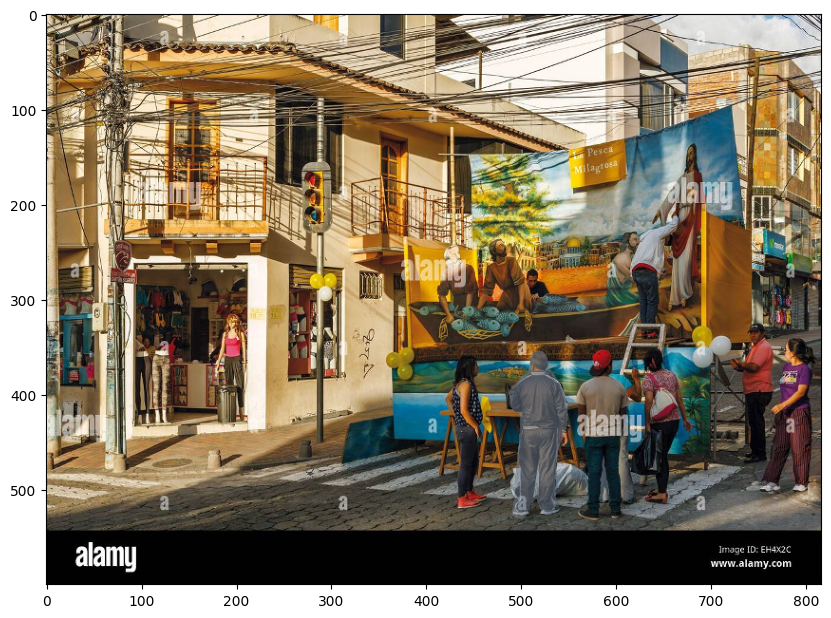

In [54]:
withmask = utils.viz.plot_mask(orig_img, np.expand_dims(masks[0], axis=0))

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(withmask)
# ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids, class_names=net.classes, ax=ax)
plt.show()

In [79]:
from PIL import Image, ImageDraw

In [81]:
bboxes[0].astype(int)

array([484, 354, 551, 531])

In [84]:
im = Image.fromarray(orig_img)
draw = ImageDraw.Draw(im)
draw.rectangle(bboxes[0].astype(int).tolist())

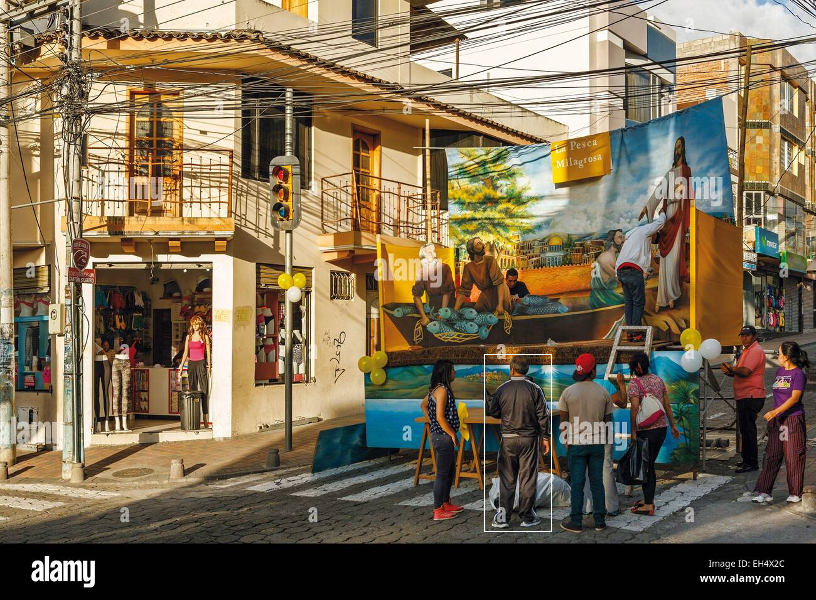

In [85]:
im.show()

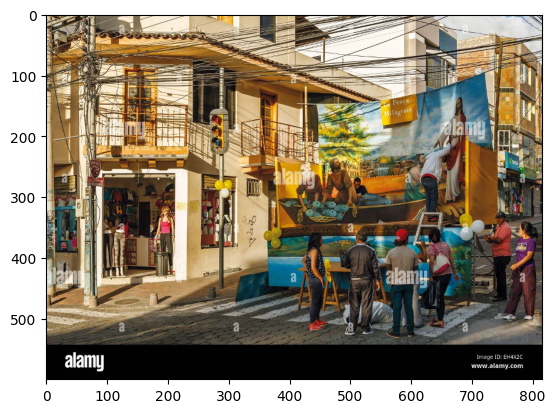

In [73]:
plt.imshow(orig_img)
plt.show()